In [1]:
# Basic Libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

#Sampling methods
from sklearn.model_selection import train_test_split, cross_val_score

#Oversamplying
from imblearn.over_sampling import RandomOverSampler

#feature engineering
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")
#pd.set_option("display.max_colmns",None)

C:\Users\kisho\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_excel('Data_Train.xlsx')

In [6]:
df_test=pd.read_excel('Test_set.xlsx')

In [7]:
df_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10683, dtype: bool

In [9]:
df_copy=df.copy(deep=True)

In [10]:
df.drop_duplicates(inplace=True)

In [12]:
df.reset_index(inplace=True,drop=True)

In [13]:
df.shape

(10463, 11)

### EDA

In [16]:
null_counts=df.isnull().sum()
null_counts[null_counts>0]

Route          1
Total_Stops    1
dtype: int64

In [17]:
df[(df['Route'].isnull()) | (df['Total_Stops'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8893,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [18]:
df.dropna(inplace=True)

In [19]:
df.reset_index(inplace=True,drop=True)

In [20]:
df.shape

(10462, 11)

In [21]:
df_copy.shape

(10683, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 899.2+ KB


In [23]:
pd.to_datetime(df['Date_of_Journey'])

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10457   2019-04-09
10458   2019-04-27
10459   2019-04-27
10460   2019-03-01
10461   2019-05-09
Name: Date_of_Journey, Length: 10462, dtype: datetime64[ns]

In [24]:
pd.to_datetime(df['Dep_Time'])

0       2024-10-16 22:20:00
1       2024-10-16 05:50:00
2       2024-10-16 09:25:00
3       2024-10-16 18:05:00
4       2024-10-16 16:50:00
                ...        
10457   2024-10-16 19:55:00
10458   2024-10-16 20:45:00
10459   2024-10-16 08:20:00
10460   2024-10-16 11:30:00
10461   2024-10-16 10:55:00
Name: Dep_Time, Length: 10462, dtype: datetime64[ns]

In [25]:
pd.to_datetime(df['Arrival_Time'])

0       2024-03-22 01:10:00
1       2024-10-16 13:15:00
2       2024-06-10 04:25:00
3       2024-10-16 23:30:00
4       2024-10-16 21:35:00
                ...        
10457   2024-10-16 22:25:00
10458   2024-10-16 23:20:00
10459   2024-10-16 11:20:00
10460   2024-10-16 14:10:00
10461   2024-10-16 19:15:00
Name: Arrival_Time, Length: 10462, dtype: datetime64[ns]

In [27]:
# Convert the 'Date_of_Journey' column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')

# Now, you can extract the month
df['Month'] = df['Date_of_Journey'].dt.month


In [28]:
df['Date'] = df['Date_of_Journey'].dt.day


In [29]:
df['Year'] = df['Date_of_Journey'].dt.year


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Arrival_Time     10462 non-null  object
 5   Duration         10462 non-null  object
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Month            10462 non-null  int32 
 10  Date             10462 non-null  int32 
 11  Year             10462 non-null  int32 
 12  Dep_hours        10462 non-null  int32 
 13  Dep_mins         10462 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 940.1+ KB


In [32]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
#DEP TIME

In [34]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], errors='coerce')


In [37]:
df['Dep_hours']=pd.to_datetime(df.Dep_Time).dt.hour

In [38]:
df['Dep_mins']=pd.to_datetime(df.Dep_Time).dt.minute

In [39]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Date,Year,Dep_hours,Dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-10-16 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-16 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-16 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25


In [40]:
df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
#ARRIVAL TIME

In [42]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], errors='coerce')


In [43]:
df['Arrival_hours']=pd.to_datetime(df.Arrival_Time).dt.hour

In [44]:
df['Arrival_mins']=pd.to_datetime(df.Arrival_Time).dt.minute

In [45]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Total_Stops      10462 non-null  object
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Month            10462 non-null  int32 
 8   Date             10462 non-null  int32 
 9   Year             10462 non-null  int32 
 10  Dep_hours        10462 non-null  int32 
 11  Dep_mins         10462 non-null  int32 
 12  Arrival_hours    10462 non-null  int32 
 13  Arrival_mins     10462 non-null  int32 
 14  Dur_hours        10462 non-null  int32 
 15  Dur_minutes      10462 non-null  int32 
dtypes: int32(9), int64(1), object(6)
memory usage: 940.1+ KB


In [47]:
df.shape

(10462, 15)

In [ ]:
#DURATIME


In [50]:
# Extract hours and minutes separately
df['Dur_hours'] = df['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
df['Dur_minutes'] = df['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)

In [70]:
df['Total_minutes'] = (df['Dur_hours'] * 60) + df['Dur_minutes']


In [71]:
df.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Date,Year,Dep_hours,Dep_mins,Arrival_hours,Arrival_mins,Dur_hours,Dur_minutes,Total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [81]:
df.drop('Route',axis=1,inplace=True)

In [82]:
df.shape

(10462, 14)

In [69]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [75]:
df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=True)

Total_Stops
non-stop     5018.506763
1 stop      10594.123556
2 stops     12761.099393
3 stops     13260.674419
4 stops     17686.000000
Name: Price, dtype: float64

In [77]:
df.corr['Total_minutes'].corr(df['Price'])

TypeError: 'method' object is not subscriptable

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Total_Stops      10462 non-null  object
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Month            10462 non-null  int32 
 8   Date             10462 non-null  int32 
 9   Year             10462 non-null  int32 
 10  Dep_hours        10462 non-null  int32 
 11  Dep_mins         10462 non-null  int32 
 12  Arrival_hours    10462 non-null  int32 
 13  Arrival_mins     10462 non-null  int32 
 14  Total_minutes    10462 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 899.2+ KB


In [80]:
df.loc[df['Price'].idxmin(), 'Airline']

'SpiceJet'

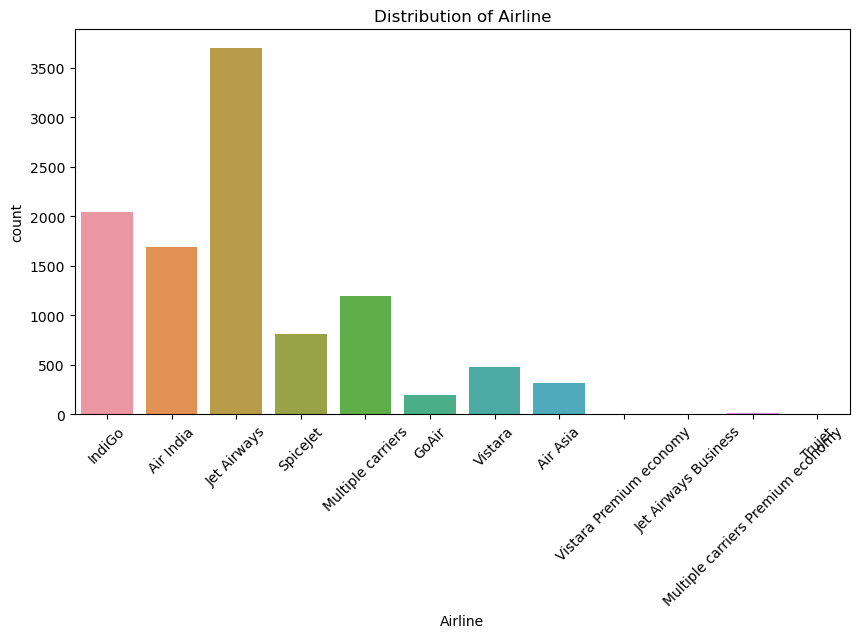

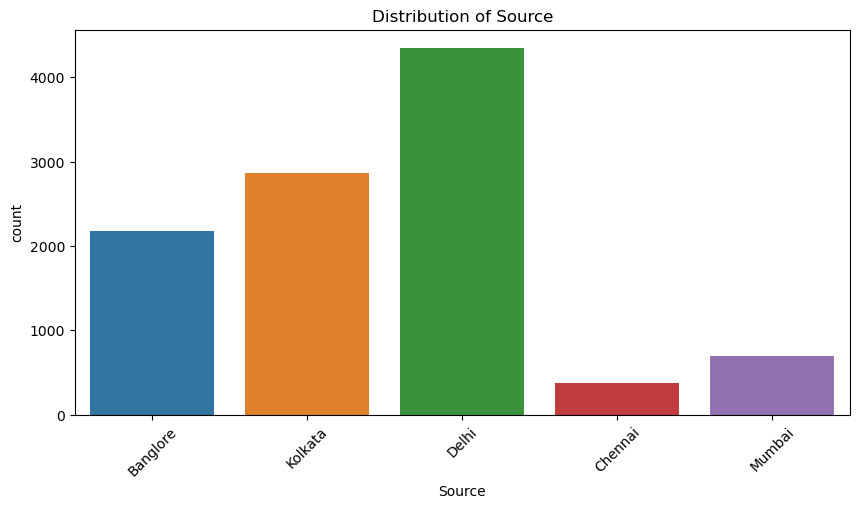

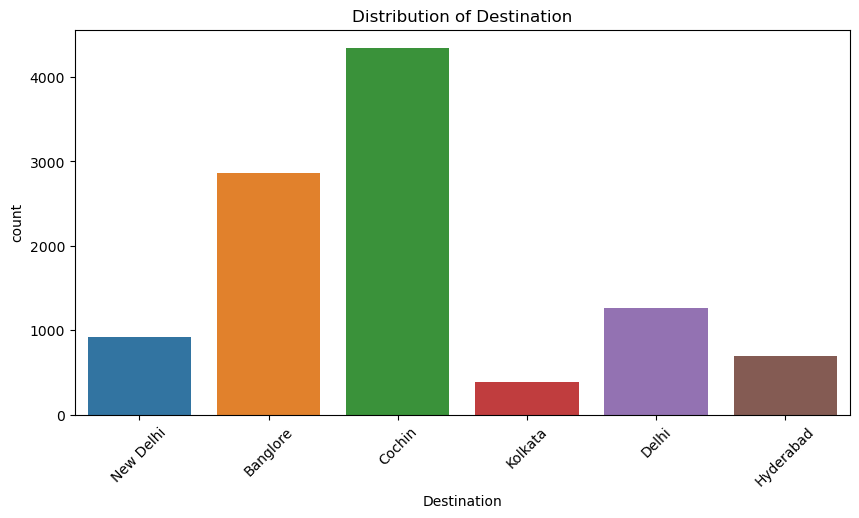

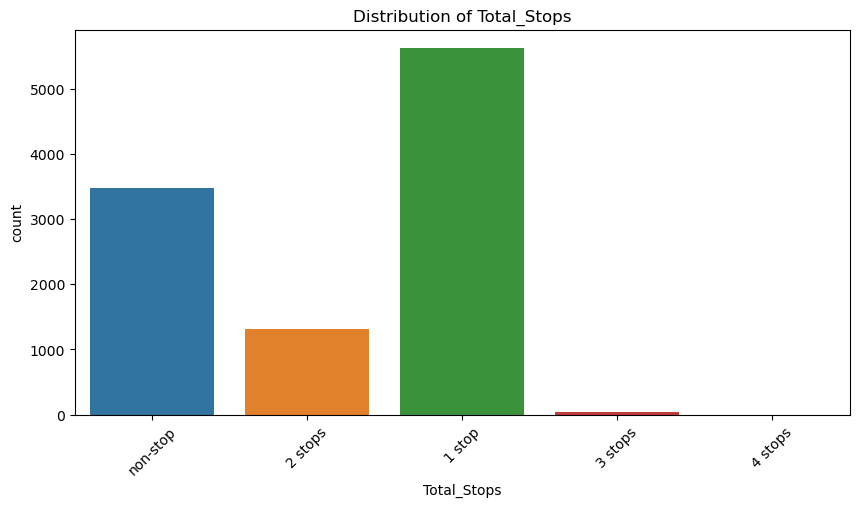

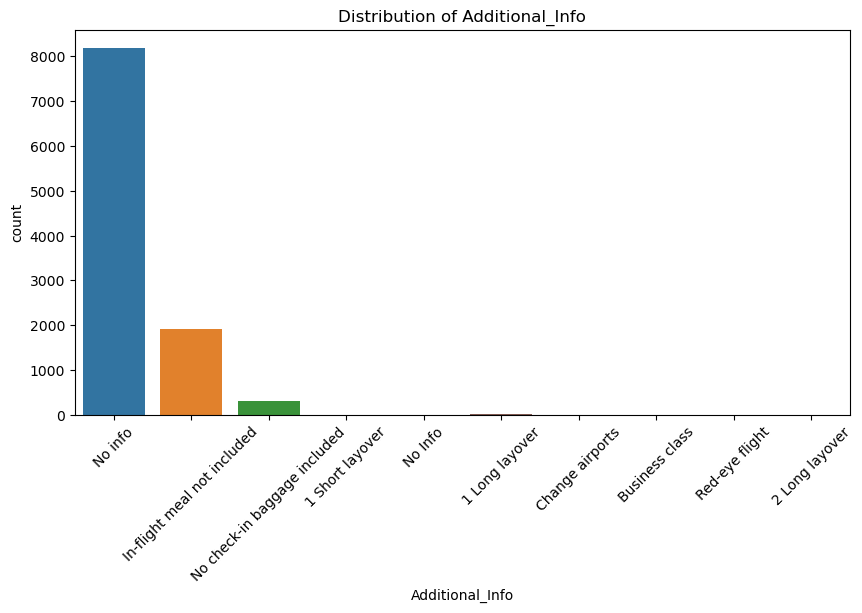

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only categorical columns (data type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()


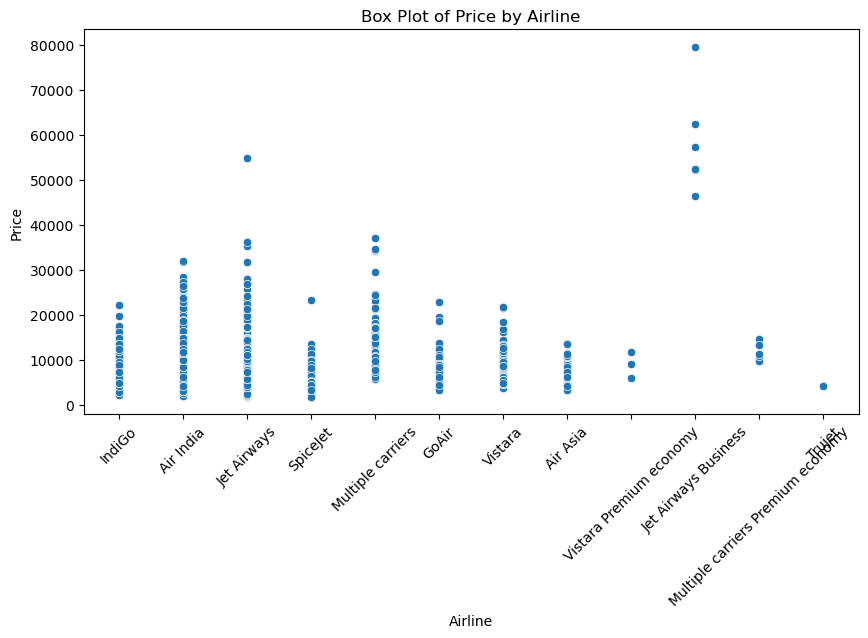

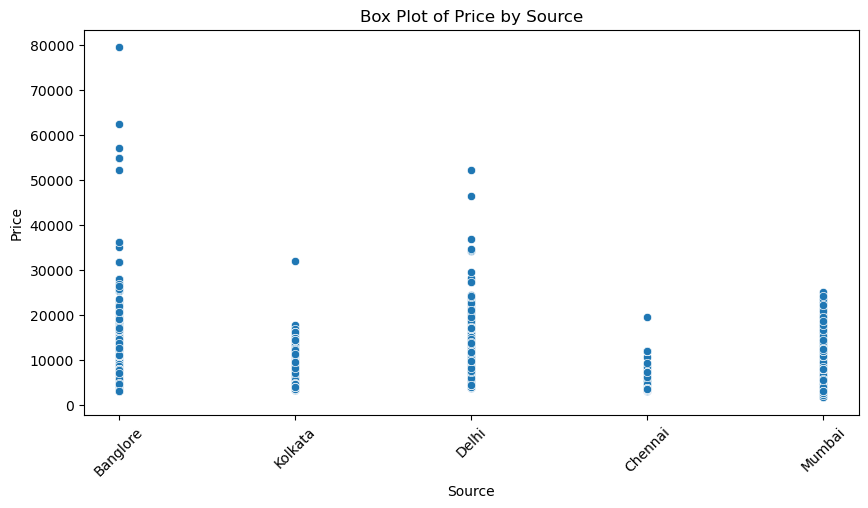

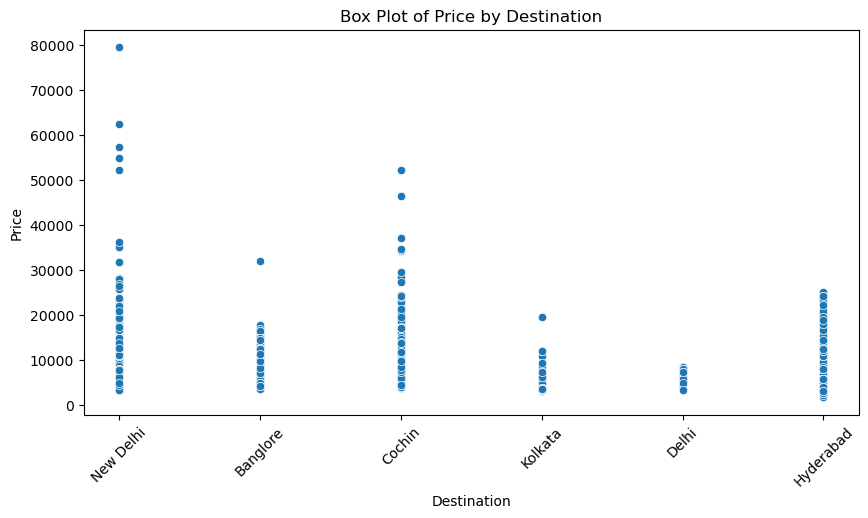

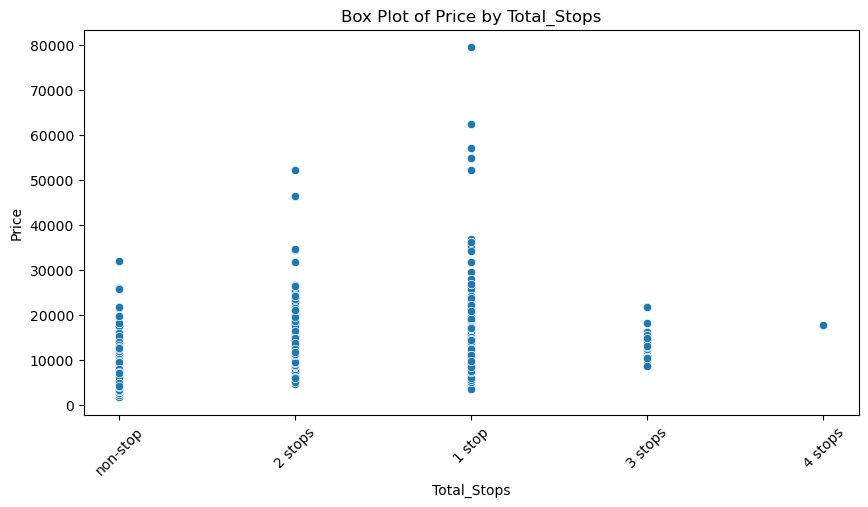

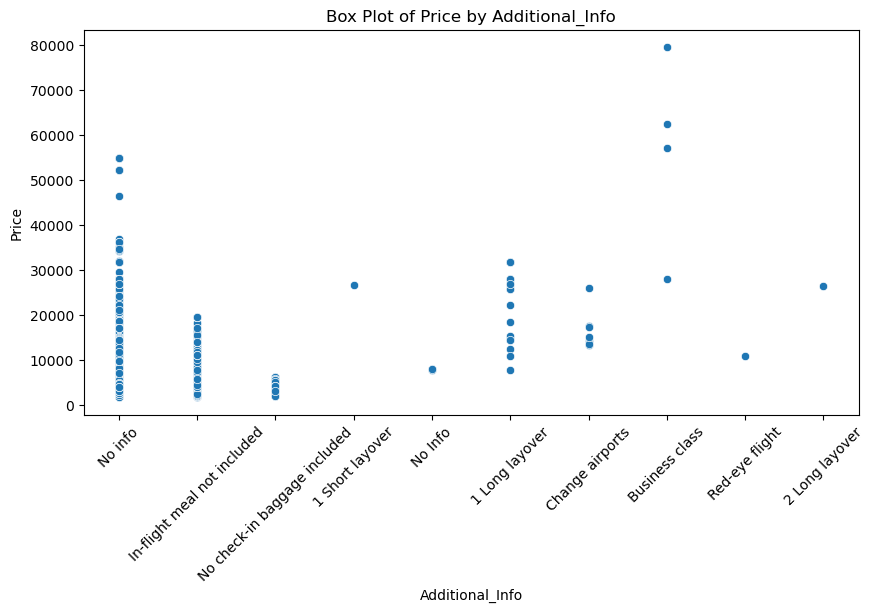

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable
target_variable = 'Price'

# Select only categorical columns (data type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot box plots for each categorical column against the target variable
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=col, y=target_variable)
    plt.title(f'Box Plot of {target_variable} by {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()


In [88]:
df.select_dtypes(include=['object']).columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

In [93]:
df.Total_Stops.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [92]:
df.Total_Stops.replace({'non-stop':0,'2 stops':2,'1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [96]:
new_train_data=pd.get_dummies(df,drop_first=True).astype('int')

In [98]:
new_train_data.shape

(10462, 39)

In [99]:
# Sampling the data set and dividing it into train and test, Further dividing it into train_X and Train_Y

Train , Test = train_test_split(df , test_size = 0.2 , random_state = 42 ) 

Train_X = Train.drop(['Price'], axis = 1)

Train_Y = Train['Price']

Test_X = Test.drop(['Price'], axis = 1)

Test_Y = Test['Price']

print("The shapes of the data sets are : ")

print("\nTrain >> {} , Test >> {}\n\nTrain_X >> {} , Train_Y >> {}\n\nTest_X >> {} , Test_Y >> {}".format(Train.shape , Test.shape , Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape))

The shapes of the data sets are : 

Train >> (8369, 14) , Test >> (2093, 14)

Train_X >> (8369, 13) , Train_Y >> (8369,)

Test_X >> (2093, 13) , Test_Y >> (2093,)


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame with 'Price' as the target variable
# Sample the dataset and split into train and test sets
Train, Test = train_test_split(new_train_data, test_size=0.2, random_state=42)

# Separate features and target variable
Train_X = Train.drop(['Price'], axis=1)
Train_Y = Train['Price']
Test_X = Test.drop(['Price'], axis=1)
Test_Y = Test['Price']

# Print the shapes of the datasets
print("The shapes of the data sets are : ")
print("\nTrain >> {} , Test >> {}\n\nTrain_X >> {} , Train_Y >> {}\n\nTest_X >> {} , Test_Y >> {}".format(
    Train.shape, Test.shape, Train_X.shape, Train_Y.shape, Test_X.shape, Test_Y.shape))

# Create and fit the linear regression model
model = LinearRegression()
model.fit(Train_X, Train_Y)

# Make predictions on the test set
predictions = model.predict(Test_X)

# Evaluate the model
mse = mean_squared_error(Test_Y, predictions)
r2 = r2_score(Test_Y, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


The shapes of the data sets are : 

Train >> (8369, 39) , Test >> (2093, 39)

Train_X >> (8369, 38) , Train_Y >> (8369,)

Test_X >> (2093, 38) , Test_Y >> (2093,)
Mean Squared Error: 7053493.66
R^2 Score: 0.66


In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame with 'Price' as the target variable
# Sample the dataset and split into train and test sets
Train, Test = train_test_split(new_train_data, test_size=0.2, random_state=42)

# Separate features and target variable
Train_X = Train.drop(['Price'], axis=1)
Train_Y = Train['Price']
Test_X = Test.drop(['Price'], axis=1)
Test_Y = Test['Price']

# Print the shapes of the datasets
print("The shapes of the data sets are : ")
print("\nTrain >> {} , Test >> {}\n\nTrain_X >> {} , Train_Y >> {}\n\nTest_X >> {} , Test_Y >> {}".format(
    Train.shape, Test.shape, Train_X.shape, Train_Y.shape, Test_X.shape, Test_Y.shape))

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(Train_X, Train_Y)

# Make predictions with Decision Tree
dt_predictions = dt_model.predict(Test_X)

# Evaluate Decision Tree
dt_mse = mean_squared_error(Test_Y, dt_predictions)
dt_r2 = r2_score(Test_Y, dt_predictions)

print(f"\nDecision Tree Regression:\nMean Squared Error: {dt_mse:.2f}\nR^2 Score: {dt_r2:.2f}")

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(Train_X, Train_Y)

# Make predictions with Random Forest
rf_predictions = rf_model.predict(Test_X)

# Evaluate Random Forest
rf_mse = mean_squared_error(Test_Y, rf_predictions)
rf_r2 = r2_score(Test_Y, rf_predictions)

print(f"\nRandom Forest Regression:\nMean Squared Error: {rf_mse:.2f}\nR^2 Score: {rf_r2:.2f}")


The shapes of the data sets are : 

Train >> (8369, 39) , Test >> (2093, 39)

Train_X >> (8369, 38) , Train_Y >> (8369,)

Test_X >> (2093, 38) , Test_Y >> (2093,)

Decision Tree Regression:
Mean Squared Error: 3349462.40
R^2 Score: 0.84

Random Forest Regression:
Mean Squared Error: 2225947.52
R^2 Score: 0.89


In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame with 'Price' as the target variable
# Sample the dataset and split into train and test sets
Train, Test = train_test_split(new_train_data, test_size=0.2, random_state=42)

# Separate features and target variable
Train_X = Train.drop(['Price'], axis=1)
Train_Y = Train['Price']
Test_X = Test.drop(['Price'], axis=1)
Test_Y = Test['Price']

# Print the shapes of the datasets
print("The shapes of the data sets are : ")
print("\nTrain >> {} , Test >> {}\n\nTrain_X >> {} , Train_Y >> {}\n\nTest_X >> {} , Test_Y >> {}".format(
    Train.shape, Test.shape, Train_X.shape, Train_Y.shape, Test_X.shape, Test_Y.shape))

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(Train_X, Train_Y)

# Make predictions with Decision Tree
dt_train_predictions = dt_model.predict(Train_X)  # Predictions on training set
dt_test_predictions = dt_model.predict(Test_X)    # Predictions on test set

# Evaluate Decision Tree
dt_train_mse = mean_squared_error(Train_Y, dt_train_predictions)
dt_train_r2 = r2_score(Train_Y, dt_train_predictions)
dt_test_mse = mean_squared_error(Test_Y, dt_test_predictions)
dt_test_r2 = r2_score(Test_Y, dt_test_predictions)

print(f"\nDecision Tree Regression (Train):\nMean Squared Error: {dt_train_mse:.2f}\nR^2 Score: {dt_train_r2:.2f}")
print(f"Decision Tree Regression (Test):\nMean Squared Error: {dt_test_mse:.2f}\nR^2 Score: {dt_test_r2:.2f}")

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(Train_X, Train_Y)

# Make predictions with Random Forest
rf_train_predictions = rf_model.predict(Train_X)  # Predictions on training set
rf_test_predictions = rf_model.predict(Test_X)    # Predictions on test set

# Evaluate Random Forest
rf_train_mse = mean_squared_error(Train_Y, rf_train_predictions)
rf_train_r2 = r2_score(Train_Y, rf_train_predictions)
rf_test_mse = mean_squared_error(Test_Y, rf_test_predictions)
rf_test_r2 = r2_score(Test_Y, rf_test_predictions)

print(f"\nRandom Forest Regression (Train):\nMean Squared Error: {rf_train_mse:.2f}\nR^2 Score: {rf_train_r2:.2f}")
print(f"Random Forest Regression (Test):\nMean Squared Error: {rf_test_mse:.2f}\nR^2 Score: {rf_test_r2:.2f}")


The shapes of the data sets are : 

Train >> (8369, 39) , Test >> (2093, 39)

Train_X >> (8369, 38) , Train_Y >> (8369,)

Test_X >> (2093, 38) , Test_Y >> (2093,)

Decision Tree Regression (Train):
Mean Squared Error: 83750.99
R^2 Score: 1.00
Decision Tree Regression (Test):
Mean Squared Error: 3349462.40
R^2 Score: 0.84

Random Forest Regression (Train):
Mean Squared Error: 382171.11
R^2 Score: 0.98
Random Forest Regression (Test):
Mean Squared Error: 2225947.52
R^2 Score: 0.89
